In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gplay = pd.read_csv('gplay.csv')
gplay.head(10)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone
5,5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone
6,6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone
7,7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone
8,8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone
9,9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone


In [3]:
gplay.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating'],
      dtype='object')

In [4]:
gplay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 847.1+ KB


In [5]:
gplay.drop("Unnamed: 0",axis = 1,inplace = True)

### Checking for Null Values

In [6]:
gplay.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

In [7]:
# Taking mean of column "Rating"

rating_mean = gplay["Rating"].mean()

In [8]:
# Replacing all null places in "Rating" with the mean of "Rating"

gplay["Rating"].fillna(rating_mean,inplace = True)

In [9]:
gplay["Type"].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [10]:
gplay[gplay["Type"] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN


In [11]:
# Removing Unwanted Row

gplay.drop(10472,inplace = True)

In [12]:
# replace all nulls in column "Type" with "free"

gplay["Type"].fillna("Free",inplace = True)

In [13]:
gplay["Type"].value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [14]:
gplay["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [15]:
gplay.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

### Cleaning & String Operation

In [16]:
# Converting column "Reviews" into "int64"

gplay["Reviews"] = gplay["Reviews"].astype(int)

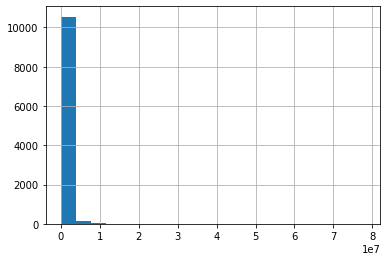

In [17]:
plt.figure()
gplay["Reviews"].hist(bins = 20)
plt.show()

In [18]:
gplay["Size"].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
526k                     1
222k                     1
270k                     1
608k                     1
169k                     1
Name: Size, Length: 461, dtype: int64

In [19]:
# Creating Function To clean the column "Size"

def clean_size(x):
    if 'k' in x:
        x = x.replace("k","")
        return float(x)/1024
    elif "M" in x:
        x = x.replace("M","")
        return float(x)
    elif x == "Varies with device":
        return np.nan
    else:
        return float(x)

In [20]:
# Replacing "Size" with New column "Size"

gplay["Size"] = gplay["Size"].map(clean_size)

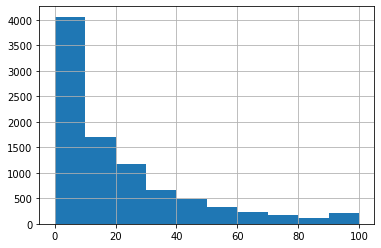

In [21]:
plt.figure()
gplay["Size"].hist()
plt.show()

In [22]:
# Taking care of Column "Installs"

gplay["Installs"].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [23]:
# Replacing the "," & "+" Signs in Column "Installs" .

gplay["Installs"] = gplay["Installs"].str.replace(",","")
gplay["Installs"] = gplay["Installs"].str.replace("+","")

In [24]:
gplay["Installs"].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [25]:
# Convrting the column "Installs" from String to "Integer"

gplay["Installs"] = gplay["Installs"].astype(int)

In [26]:
# Taking care of column "Price"

gplay["Price"].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$2.95         1
$46.99        1
$89.99        1
$2.59         1
$4.80         1
Name: Price, Length: 92, dtype: int64

In [27]:
# Replacing the "$" Signs from column "Price" 

gplay["Price"] = gplay["Price"].str.replace("$","")

In [28]:
# Converting column "Price" from String to "float" type

gplay["Price"] = gplay["Price"].astype(float)

## Clean Data Frame

In [29]:
gplay.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone


# Analysis

### Que. :  Highest Rated App

In [30]:
gplay["Rating"].max()

5.0

In [31]:
gplay_High_Rated_App = gplay[gplay["Rating"] == 5.0]

In [32]:
gplay_High_Rated_App["App"].head(10)

329                   Hojiboy Tojiboyev Life Hacks
612                  American Girls Mobile Numbers
615                                   Awake Dating
633                          Spine- The dating app
636     Girls Live Talk - Free Text and Video Chat
640                        Online Girls Chat Group
654                Speeding Joyride & Car Meet App
1028                              SUMMER SONIC app
1030                                    Prosperity
1038                     Mindvalley U Tallinn 2018
Name: App, dtype: object

### Que.: Highest Installed App

In [33]:
gplay["Installs"].max()

1000000000

In [34]:
gplay_High_Installed_App = gplay[gplay["Installs"] == 1000000000]

In [35]:
gplay_High_Installed_App["App"].head(10)

152                           Google Play Books
335    Messenger – Text and Video Chat for Free
336                          WhatsApp Messenger
338                Google Chrome: Fast & Secure
340                                       Gmail
341                                    Hangouts
381                          WhatsApp Messenger
382    Messenger – Text and Video Chat for Free
386                                    Hangouts
391               Skype - free IM & video calls
Name: App, dtype: object

### Que.: Highest Reviewed App

In [36]:
gplay["Reviews"].max()

78158306

In [37]:
gplay_High_Reviewed_App = gplay[gplay["Reviews"] == 78158306]

In [38]:
gplay_High_Reviewed_App["App"].head()

2544    Facebook
Name: App, dtype: object

### Que.: Most Expensive App

In [39]:
gplay["Price"].max()

400.0

In [40]:
gplay_Expensive_App = gplay[gplay["Price"] == 400.0]

In [41]:
gplay_Expensive_App["App"].head()

4367    I'm Rich - Trump Edition
Name: App, dtype: object